agenda <br>
* with losses
* gif generator

In [1]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 5.4MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#ct data

# download = drive.CreateFile({'id': '1zQOnX-0aF6FrnJdm5h1sb-rxbAz6vI3C'})
# download.GetContentFile('ct_train.npy')
# download = drive.CreateFile({'id': '13uvHwfdv7Milsoxrh5RuQiXdx9CHZSe5'})
# download.GetContentFile('y_patches_train.npy')
# download = drive.CreateFile({'id': '15y89D99Rj4UEx_PXY7_EbhQJXmrzxLZn'})
# download.GetContentFile('ct_test.npy')
# download = drive.CreateFile({'id': '14viNB9pQ0oujFEuCLG8nfbzIuUaiOW1P'})
# download.GetContentFile('y_patches_test.npy')
# download = drive.CreateFile({'id': '1aYsDxEwrbakX-HoAtM86UmcvaY69hZIs'})
# download.GetContentFile('ct_train_pos.npy')
# download = drive.CreateFile({'id': '1zRXvc4SYB7a9-hQ-GxYQKZZiKkGQo3-H'})
# download.GetContentFile('y_train_pos.npy')



In [0]:
#pet data [not sure if regular or mixed]
download = drive.CreateFile({'id': '1vqB-aiGem_Qombpp6f43JmZgSzBJEWlP'})
download.GetContentFile('pet_train.npy')
download = drive.CreateFile({'id': '1NeAPPQKypZZtRX_uYOByTpXDkPLvfI2e'})
download.GetContentFile('y_patches_train.npy')
download = drive.CreateFile({'id': '19CGODswlrI4uUagFfsCXoBVZYA0MI8SE'})
download.GetContentFile('pet_test.npy')
download = drive.CreateFile({'id': '1kl4gR6GYwjFL50EdRtmCQYK9tigUOu8L'})
download.GetContentFile('y_patches_test.npy')

In [5]:
!pip install keras-vis

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#ct data
# ct_train = np.load('ct_train.npy')
# y_patches_train = np.load('y_patches_train.npy')
# ct_test = np.load('ct_test.npy')
# y_patches_test = np.load('y_patches_test.npy')
# ct_train_pos = np.load('ct_train_pos.npy')
# y_train_pos = np.load('y_train_pos.npy')

#pet data
pet_train = np.load('pet_train.npy')
y_patches_train = np.load('y_patches_train.npy')
pet_test = np.load('pet_test.npy')
y_patches_test = np.load('y_patches_test.npy')

In [7]:
def metadata(arrays):
  for i in arrays:
    print(i.shape, np.amax(i), np.amin(i), np.mean(i), np.std(i))
    
metadata([pet_train, pet_test, y_patches_train])

(41338, 56, 56, 1) 23.6185 -0.60305774 0.30131912 1.2549722
(4212, 56, 56, 1) 19.909306 -0.67381537 0.32361102 1.2939103
(41338, 28, 28, 1) 1 0 0.12890922371174024 0.33509944158977156


In [8]:
import six
from keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten,
    concatenate
)
from keras.layers.convolutional import (
    Conv2D, Conv2DTranspose,
    MaxPooling2D,
    AveragePooling2D
)
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K


Using TensorFlow backend.


In [0]:
def UNET_2D(x_train, activation = 'relu', padding = 'same'): 
    '''
    2d UNet implementation
    '''
    inputs = Input(x_train.shape[1:])
    conv1 = Conv2D(32, (3, 3), activation= activation, padding= padding)(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation= activation, padding= padding)(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation= activation, padding= padding)(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation= activation, padding= padding)(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation= activation, padding= padding)(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation= activation, padding= padding)(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation= activation, padding= padding)(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation= activation, padding= padding)(conv4)
    conv4 = BatchNormalization()(conv4)

    conv6 = Conv2D(256, (3, 3), activation= activation, padding= padding)(conv4)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation= activation, padding= padding)(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding= padding)(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation= activation, padding= padding)(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation= activation, padding= padding)(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding= padding)(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation= activation, padding= padding)(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation= activation, padding= padding)(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up9 = concatenate([Conv2DTranspose(32, (2,2), strides = (2,2), padding = padding)(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation= activation, padding= padding)(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation= activation, padding= padding)(conv9)
    conv9 = BatchNormalization()(conv9)

    conv9 = Conv2D(32, (1, 1), activation= activation)(conv9)
#     conv9 = Conv2D(32, (1,1), strides = 2, activation = activation)(conv9)
    conv9 = MaxPooling2D(pool_size = (2,2))(conv9)
    conv10 = Conv2D(1, (1,1), activation = 'sigmoid')(conv9)
    
    model = Model(inputs=[inputs], outputs=[conv10])

    return model

In [10]:
#UNET
model = UNET_2D(pet_train)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 56, 56, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 56, 56, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 56, 56, 32)   9248        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

In [0]:
#hyperparameters
hm_epochs = 1
batch_size = 15

# #loss/evaluation
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


#compiling model
import keras
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=1, verbose=1, mode='auto')
adam = keras.optimizers.Adam(lr=2e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3, amsgrad=False)
model.compile(optimizer = adam, loss = dice_coef_loss, metrics = [dice_coef])
# model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [12]:
#regular training 
history = model.fit(pet_train, y_patches_train, batch_size = batch_size, epochs = hm_epochs, callbacks = [callback], validation_data= (pet_test, y_patches_test), shuffle = True)

Train on 41338 samples, validate on 4212 samples
Epoch 1/1
 4575/41338 [==>...........................] - ETA: 5:35 - loss: -0.2878 - dice_coef: 0.2878

41325/41338 [============================>.] - ETA: 0s - loss: -0.3931 - dice_coef: 0.3931

41338/41338 [==============================] - 352s 9ms/step - loss: -0.3930 - dice_coef: 0.3930 - val_loss: -0.2084 - val_dice_coef: 0.2084


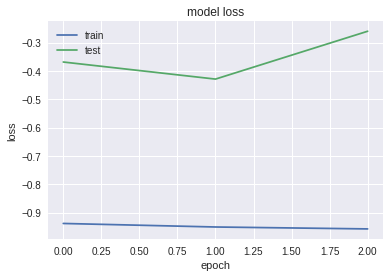

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model.evaluate(pet_test, y_patches_test)

4212/4212 [==============================] - 6s 1ms/step


[-0.2092257105273965, 0.2092257105273965]

In [0]:
# model.save('idkpet051dice.h5')
# from google.colab import files
# files.download('idkpet051dice.h5')

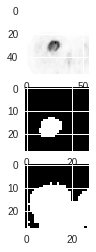

In [14]:
predict = model.predict(pet_test)
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
predict[predict<0.5] = 0
predict[predict>0.5] = 1
ax1.imshow(pet_test[0].squeeze())
ax2.imshow(y_patches_test[0].squeeze(), cmap = 'bone')
ax3.imshow(predict[0].squeeze(), cmap = 'bone')

In [38]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_patches_test.flatten(), predict.flatten(), average = 'binary')

(0.6381078029091803, 0.33409041684471785, 0.4385642712239503, None)

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


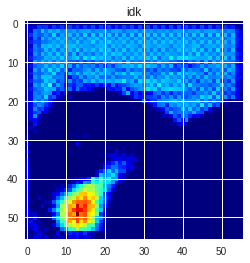

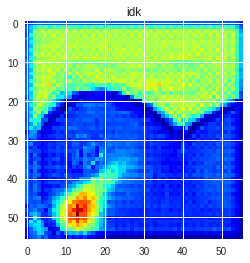

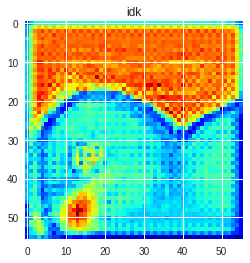

In [37]:
from vis.visualization import visualize_cam

for i, modifier in enumerate(modifiers):
    heatmap = visualize_cam(model, layer_idx=-1, filter_indices=0, 
                            seed_input=img, grad_modifier=modifier)
    plt.figure()
    plt.title(titles[i])
    plt.imshow(heatmap)
    # Overlay is used to alpha blend heatmap onto img.
#     plt.imshow(overlay(img, heatmap, alpha=0.7))

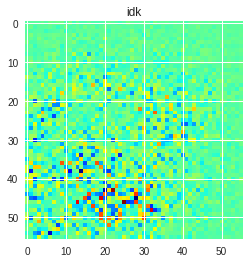

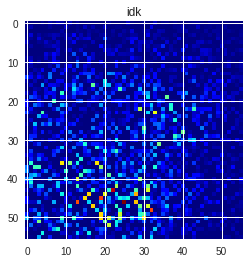

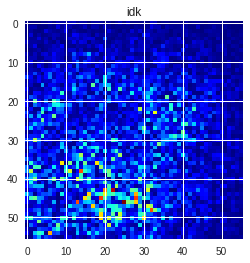

In [29]:
from vis.utils import utils
from vis.visualization import visualize_saliency, overlay
from keras.preprocessing.image import img_to_array
import tensorflow as tf

img = ct_test[0]#E.squeeze()
rgb_img = tf.image.grayscale_to_rgb(img)

titles = ['idk', 'idk', 'idk']
modifiers = [None, 'relu', 'absolute']

for i, modifier in enumerate(modifiers):
    heatmap = visualize_saliency(model, layer_idx=-1, filter_indices=0, 
                                 seed_input=ct_test[0], grad_modifier=modifier)

    plt.figure()
    plt.title(titles[i])
    plt.imshow(heatmap)
#     sess = tf.Session()
#     with sess.as_default():
#       new_img = rgb_img.eval()
    #Overlay is used to alpha blend heatmap onto img.
#     plt.imshow(overlay(new_img, heatmap.squeeze(), alpha=0.7))